## K-Means Clustering

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
# model
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# importing the data
x=df[['age' ,'fare']]
x.age.fillna(value=x['age'].mean() ,inplace=True)

# scaler
scaler=StandardScaler()
x_scaled =scaler.fit_transform(x)

# perform clustering
model=KMeans(n_clusters=5)
model.fit(x_scaled)

# assign cluster label to the data
df['cluster'] = model.labels_


C:\Users\Afaq khalid\AppData\Local\Temp\ipykernel_1964\2912910970.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [26]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,4
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [27]:
df['cluster'].unique()

array([1, 4, 3, 0, 2])

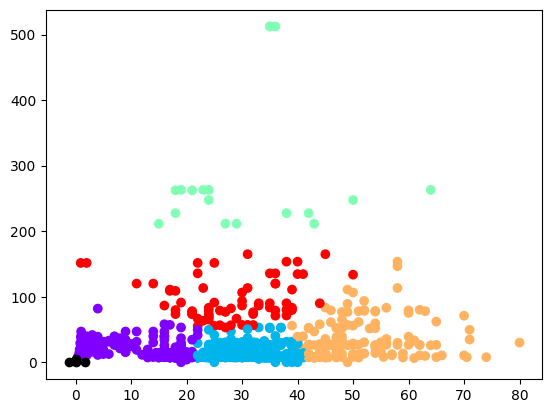

In [28]:
plt.scatter(df['age'] ,df['fare'] ,c=df['cluster'] ,cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], color='black')
plt.show()

In [29]:
import plotly.express as px
fig=px.scatter(df, x='age' ,y='fare' ,color='cluster')
fig.show()

In [30]:
import plotly.express as px
fig=px.scatter_3d(df, x='age' ,z='pclass' ,y='fare' ,color='cluster')
fig.show()

In [31]:
fig=px.parallel_coordinates(df ,color='cluster' ,title='Titanic Cluster')
fig.show()

c:\Users\Afaq khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [32]:
pip install joblib

In [33]:
# saving the model
import joblib
joblib.dump(model ,'KMeansClustering.joblib')

['KMeansClustering.joblib']

In [34]:
# load the saved model
model_loaded =joblib.load('KMeansClustering.joblib')

In [35]:
import seaborn as sns
df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [36]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [38]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_1['smoker'])
df_1['smoker'] =le.transform(df_1['smoker'])

In [39]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_1['day'])
df_1['day'] =le.transform(df_1['day'])

In [40]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_1['time'])
df_1['time'] =le.transform(df_1['time'])

In [41]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [42]:
x=df_1.drop(columns=['sex'])
y=df_1['sex']

In [43]:
x.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [44]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [45]:
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier()
model=model.fit(x,y)

In [46]:
joblib.dump(model ,'tipswalamodel.joblib')

['tipswalamodel.joblib']

In [47]:
model_1=joblib.load('tipswalamodel.joblib')